<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 94% 82.0M/86.8M [00:00<00:00, 139MB/s]
100% 86.8M/86.8M [00:00<00:00, 124MB/s]


In [4]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-05-13 15:50:17--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-05-13 15:50:17 (12.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import unzip_data, walk_through_dir,plot_loss_curves

In [6]:
unzip_data('/content/brain-tumor-classification-mri.zip')

In [7]:
train_dir = '/content/Training'
test_dir = '/content/Testing'

In [8]:
walk_through_dir('/content/Testing')

There are 4 directories and 0 images in '/content/Testing'.
There are 0 directories and 100 images in '/content/Testing/glioma_tumor'.
There are 0 directories and 105 images in '/content/Testing/no_tumor'.
There are 0 directories and 74 images in '/content/Testing/pituitary_tumor'.
There are 0 directories and 115 images in '/content/Testing/meningioma_tumor'.


In [9]:
walk_through_dir('/content/Training')

There are 4 directories and 0 images in '/content/Training'.
There are 0 directories and 826 images in '/content/Training/glioma_tumor'.
There are 0 directories and 395 images in '/content/Training/no_tumor'.
There are 0 directories and 827 images in '/content/Training/pituitary_tumor'.
There are 0 directories and 822 images in '/content/Training/meningioma_tumor'.


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_aug = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.1,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True)
test_data_aug = ImageDataGenerator(rescale=1/255.)

In [11]:
train_data = train_data_aug.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                class_mode="categorical",
                                                batch_size=32)
test_data = test_data_aug.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [12]:
model_0= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(4,4),
                           padding='valid',
                           strides=(1,1),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(4,4),
                           padding='valid',
                           strides=(1,1),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(4,4),
                           padding='valid',
                           strides=(1,1),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_0.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
history_0 = model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data ),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
90/90 [==============================] - 47s 459ms/step - loss: 1.3247 - accuracy: 0.3596 - val_loss: 1.6560 - val_accuracy: 0.2284
Epoch 2/5
90/90 [==============================] - 40s 444ms/step - loss: 1.2579 - accuracy: 0.3965 - val_loss: 1.7340 - val_accuracy: 0.2563
Epoch 3/5
90/90 [==============================] - 40s 440ms/step - loss: 1.2025 - accuracy: 0.4411 - val_loss: 2.0829 - val_accuracy: 0.2868
Epoch 4/5
90/90 [==============================] - 40s 443ms/step - loss: 1.1664 - accuracy: 0.4617 - val_loss: 1.7815 - val_accuracy: 0.3223
Epoch 5/5
90/90 [==============================] - 40s 444ms/step - loss: 1.1101 - accuracy: 0.5153 - val_loss: 2.1277 - val_accuracy: 0.3046


In [15]:
model_1= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [16]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data ),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
90/90 [==============================] - 49s 462ms/step - loss: 1.1028 - accuracy: 0.5282 - val_loss: 1.7267 - val_accuracy: 0.1878
Epoch 2/5
90/90 [==============================] - 41s 460ms/step - loss: 0.9939 - accuracy: 0.5735 - val_loss: 2.5733 - val_accuracy: 0.2132
Epoch 3/5
90/90 [==============================] - 45s 503ms/step - loss: 0.9749 - accuracy: 0.5826 - val_loss: 2.5978 - val_accuracy: 0.2005
Epoch 4/5
90/90 [==============================] - 44s 490ms/step - loss: 0.9489 - accuracy: 0.5979 - val_loss: 2.8003 - val_accuracy: 0.1878
Epoch 5/5
90/90 [==============================] - 43s 476ms/step - loss: 0.9086 - accuracy: 0.6146 - val_loss: 3.9599 - val_accuracy: 0.1878


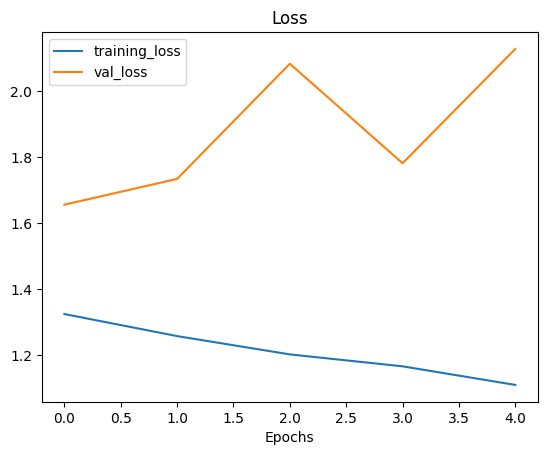

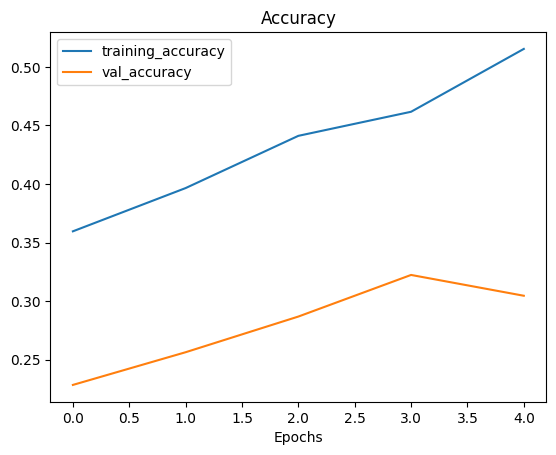

In [17]:
plot_loss_curves(history_0)

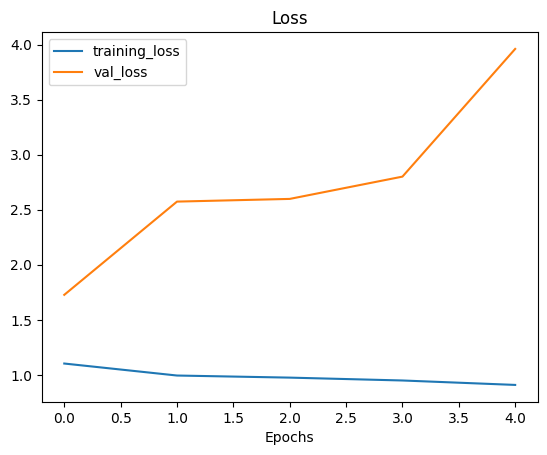

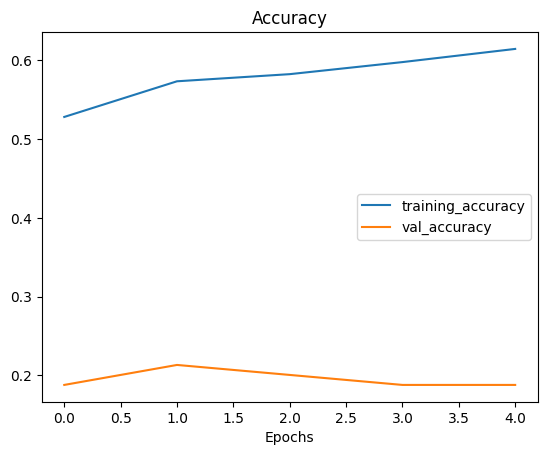

In [18]:
plot_loss_curves(history_1)

In [20]:
model_2= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(7,7),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [21]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
history_2 = model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data ),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
90/90 [==============================] - 41s 433ms/step - loss: 1.3440 - accuracy: 0.3449 - val_loss: 1.4711 - val_accuracy: 0.2030
Epoch 2/10
90/90 [==============================] - 39s 437ms/step - loss: 1.2863 - accuracy: 0.3951 - val_loss: 1.4556 - val_accuracy: 0.2157
Epoch 3/10
90/90 [==============================] - 39s 438ms/step - loss: 1.2453 - accuracy: 0.4178 - val_loss: 1.4903 - val_accuracy: 0.2056
Epoch 4/10
90/90 [==============================] - 40s 439ms/step - loss: 1.1864 - accuracy: 0.4551 - val_loss: 1.5679 - val_accuracy: 0.2843
Epoch 5/10
90/90 [==============================] - 41s 455ms/step - loss: 1.1557 - accuracy: 0.4808 - val_loss: 1.5136 - val_accuracy: 0.2614
Epoch 6/10
90/90 [==============================] - 40s 443ms/step - loss: 1.1159 - accuracy: 0.5146 - val_loss: 1.5073 - val_accuracy: 0.2462
Epoch 7/10
90/90 [==============================] - 39s 433ms/step - loss: 1.0793 - accuracy: 0.5296 - val_loss: 1.5898 - val_accuracy: 0.2690

In [28]:
efficientrel_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"

In [43]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

IMAGE_SHAPE = (224,224)

def create_model(model_url,num_classes=4):
  feature_extractor_layer = None
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name=feature_extractor_layer,
                                           input_shape=IMAGE_SHAPE + (3,))
  model_4 = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes,activation="softmax", name='output_layer')
  ])

  return model_4



In [44]:
resnet_model = create_model(resnet_url,
                            num_classes=train_data.num_classes)

In [31]:
train_data.num_classes

4

In [45]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 23572996 (89.92 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [49]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [50]:
resnet_history = resnet_model.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data ),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
90/90 [==============================] - 52s 527ms/step - loss: 0.9323 - accuracy: 0.6254 - val_loss: 1.1025 - val_accuracy: 0.5609
Epoch 2/10
90/90 [==============================] - 42s 464ms/step - loss: 0.5584 - accuracy: 0.7843 - val_loss: 1.1059 - val_accuracy: 0.6015
Epoch 3/10
90/90 [==============================] - 41s 458ms/step - loss: 0.4863 - accuracy: 0.8139 - val_loss: 1.1222 - val_accuracy: 0.6320
Epoch 4/10
90/90 [==============================] - 42s 462ms/step - loss: 0.4563 - accuracy: 0.8334 - val_loss: 1.0104 - val_accuracy: 0.6472
Epoch 5/10
90/90 [==============================] - 41s 455ms/step - loss: 0.4377 - accuracy: 0.8345 - val_loss: 0.9434 - val_accuracy: 0.6802
Epoch 6/10
90/90 [==============================] - 42s 464ms/step - loss: 0.4007 - accuracy: 0.8526 - val_loss: 0.9780 - val_accuracy: 0.6777
Epoch 7/10
90/90 [==============================] - 41s 460ms/step - loss: 0.3837 - accuracy: 0.8530 - val_loss: 0.9975 - val_accuracy: 0.6751

In [52]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         filepath=checkpoint_path,
                                                         verbose=1)
resnet_history = resnet_model.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data ),
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks=[checkpoint_callback])

Epoch 1/10
90/90 [==============================] - ETA: 0s - loss: 0.3430 - accuracy: 0.8679
Epoch 1: val_loss improved from inf to 1.02351, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
90/90 [==============================] - 42s 465ms/step - loss: 0.3430 - accuracy: 0.8679 - val_loss: 1.0235 - val_accuracy: 0.6929
Epoch 2/10
90/90 [==============================] - ETA: 0s - loss: 0.3392 - accuracy: 0.8749
Epoch 2: val_loss improved from 1.02351 to 0.89899, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
90/90 [==============================] - 45s 496ms/step - loss: 0.3392 - accuracy: 0.8749 - val_loss: 0.8990 - val_accuracy: 0.7183
Epoch 3/10
90/90 [==============================] - ETA: 0s - loss: 0.3091 - accuracy: 0.8864
Epoch 3: val_loss did not improve from 0.89899
90/90 [==============================] - 42s 462ms/step - loss: 0.3091 - accuracy: 0.8864 - val_loss: 0.9174 - val_accuracy: 0.7056
Epoch 4/10
90/90 [=================